In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score

In [6]:
df = pd.read_csv("RTA Dataset.csv")

In [7]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: Accident_severity, dtype: int64


<Axes: >

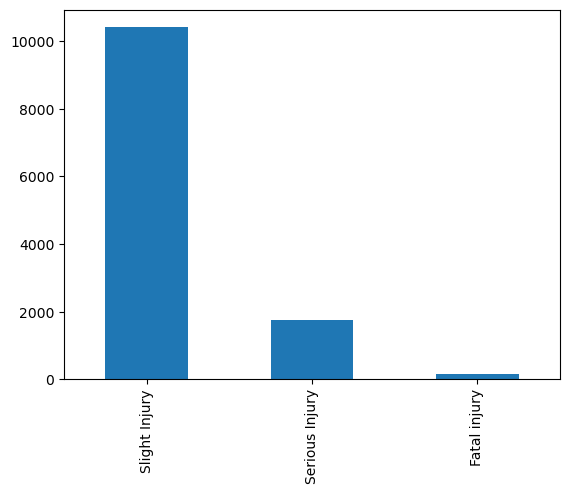

In [8]:
print(df['Accident_severity'].value_counts())
df['Accident_severity'].value_counts().plot(kind='bar')

In [9]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [10]:
df.dtypes

Time                           object
Day_of_week                    object
Age_band_of_driver             object
Sex_of_driver                  object
Educational_level              object
Vehicle_driver_relation        object
Driving_experience             object
Type_of_vehicle                object
Owner_of_vehicle               object
Service_year_of_vehicle        object
Defect_of_vehicle              object
Area_accident_occured          object
Lanes_or_Medians               object
Road_allignment                object
Types_of_Junction              object
Road_surface_type              object
Road_surface_conditions        object
Light_conditions               object
Weather_conditions             object
Type_of_collision              object
Number_of_vehicles_involved     int64
Number_of_casualties            int64
Vehicle_movement               object
Casualty_class                 object
Sex_of_casualty                object
Age_band_of_casualty           object
Casualty_sev

In [11]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [12]:
df.corr()

/var/folders/65/r4r8wyjs39ddgt3bvzyg8_b40000gn/T/ipykernel_10851/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Number_of_vehicles_involved,Number_of_casualties
Number_of_vehicles_involved,1.000000,0.213427
Number_of_casualties,0.213427,1.000000


In [13]:
df['Time'] = pd.to_datetime(df['Time'])

In [14]:
new_df = df.copy()
new_df['Hour_of_Day'] = new_df['Time'].dt.hour
n_df = new_df.drop('Time', axis=1)
n_df

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour_of_Day
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury,17
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,17
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,...,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury,17
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,...,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,1
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,No defect,...,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury,16
12312,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,No defect,...,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury,18
12313,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,No defect,...,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury,13
12314,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,No defect,...,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury,13


In [15]:
features = ['Day_of_week','Number_of_vehicles_involved','Number_of_casualties','Area_accident_occured',
           'Types_of_Junction','Age_band_of_driver','Sex_of_driver','Educational_level',
           'Vehicle_driver_relation','Type_of_vehicle','Driving_experience','Service_year_of_vehicle','Type_of_collision',
           'Sex_of_casualty','Age_band_of_casualty','Cause_of_accident','Hour_of_Day']
len(features)

17

In [16]:
featureset_df = n_df[features]
target = n_df['Accident_severity']

In [17]:
featureset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Day_of_week                  12316 non-null  object
 1   Number_of_vehicles_involved  12316 non-null  int64 
 2   Number_of_casualties         12316 non-null  int64 
 3   Area_accident_occured        12077 non-null  object
 4   Types_of_Junction            11429 non-null  object
 5   Age_band_of_driver           12316 non-null  object
 6   Sex_of_driver                12316 non-null  object
 7   Educational_level            11575 non-null  object
 8   Vehicle_driver_relation      11737 non-null  object
 9   Type_of_vehicle              11366 non-null  object
 10  Driving_experience           11487 non-null  object
 11  Service_year_of_vehicle      8388 non-null   object
 12  Type_of_collision            12161 non-null  object
 13  Sex_of_casualty              12

In [18]:
feature_df = featureset_df.copy()

In [19]:
feature_df['Service_year_of_vehicle'] = feature_df['Service_year_of_vehicle'].fillna('Unknown')
feature_df['Types_of_Junction'] = feature_df['Types_of_Junction'].fillna('Unknown')
feature_df['Area_accident_occured'] = feature_df['Area_accident_occured'].fillna('Unknown')
feature_df['Driving_experience'] = feature_df['Driving_experience'].fillna('unknown')
feature_df['Type_of_vehicle'] = feature_df['Type_of_vehicle'].fillna('Other')
feature_df['Vehicle_driver_relation'] = feature_df['Vehicle_driver_relation'].fillna('Unknown')
feature_df['Educational_level'] = feature_df['Educational_level'].fillna('Unknown')
feature_df['Type_of_collision'] = feature_df['Type_of_collision'].fillna('Unknown')

In [20]:
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Day_of_week                  12316 non-null  object
 1   Number_of_vehicles_involved  12316 non-null  int64 
 2   Number_of_casualties         12316 non-null  int64 
 3   Area_accident_occured        12316 non-null  object
 4   Types_of_Junction            12316 non-null  object
 5   Age_band_of_driver           12316 non-null  object
 6   Sex_of_driver                12316 non-null  object
 7   Educational_level            12316 non-null  object
 8   Vehicle_driver_relation      12316 non-null  object
 9   Type_of_vehicle              12316 non-null  object
 10  Driving_experience           12316 non-null  object
 11  Service_year_of_vehicle      12316 non-null  object
 12  Type_of_collision            12316 non-null  object
 13  Sex_of_casualty              12

In [21]:
X = feature_df[features]
y = target

In [22]:
encoded_df = pd.get_dummies(X, drop_first=True)
encoded_df.shape

(12316, 106)

In [23]:
lb = LabelEncoder()
lb.fit(y)
y_encoded = lb.transform(y)
print("Encoded labels:",lb.classes_)
y_en = pd.Series(y_encoded)

Encoded labels: ['Fatal injury' 'Serious Injury' 'Slight Injury']


In [24]:
mi_calc = mutual_info_classif(encoded_df, y_en, random_state=42)

In [25]:
mi_df = pd.DataFrame({'Columns':encoded_df.columns, 'MI_score':mi_calc})
mi_df.sort_values(by='MI_score',ascending=False).head(15)

,Columns,MI_score
1,Number_of_casualties,0.013183
0,Number_of_vehicles_involved,0.013009
46,Type_of_vehicle_Long lorry,0.006190
69,Service_year_of_vehicle_Below 1yr,0.005561
28,Types_of_Junction_Y Shape,0.005364
11,Area_accident_occured_ Hospital areas,0.005284
61,Driving_experience_5-10yr,0.005004
26,Types_of_Junction_Unknown,0.004723
104,Cause_of_accident_Turnover,0.004536
5,Day_of_week_Sunday,0.004210


In [26]:
fs = SelectKBest(chi2, k=50)
X_new = fs.fit_transform(encoded_df, y_en)
X_new.shape
cols = fs.get_feature_names_out()

In [27]:
fs_df = pd.DataFrame(X_new, columns=cols)

In [28]:
n_cat_index = np.array(range(3,50))

smote = SMOTENC(categorical_features=n_cat_index, random_state=42, n_jobs=True)
X_n, y_n = smote.fit_resample(fs_df,y_en)
X_n.shape, y_n.shape

/Users/nandakumarreddy/Desktop/anaconda/anaconda3/envs/ml/lib/python3.9/site-packages/imblearn/over_sampling/_smote/base.py:572: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/Users/nandakumarreddy/Desktop/anaconda/anaconda3/envs/ml/lib/python3.9/site-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


((31245, 50), (31245,))

In [29]:
y_n.value_counts()

2    10415
1    10415
0    10415
dtype: int64

In [30]:
X_trn, X_tst, y_trn, y_tst = train_test_split(X_n, y_n, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=800, max_depth=40, random_state=42)
rf.fit(X_trn, y_trn)

predics = rf.predict(X_tst)

In [44]:
rf.score(X_trn, y_trn)

0.9850776124179869

In [54]:
X_tst[1:2]

,Number_of_vehicles_involved,Number_of_casualties,Hour_of_Day,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Area_accident_occured_ Recreational areas,Area_accident_occured_ Hospital areas,Area_accident_occured_ Outside rural areas,Area_accident_occured_Recreational areas,...,Cause_of_accident_Driving to the left,Cause_of_accident_Improper parking,Cause_of_accident_Moving Backward,Cause_of_accident_No distancing,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Turnover
10388,2,2,19,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
rf.predict(X_tst[1:6])

array([2, 2, 0, 1, 2])

In [32]:
import pickle

In [41]:
data={"model":rf,'Day_of_week':pd.get_dummies('Day_of_week'),'Number_of_vehicles_involved':pd.get_dummies('Number_of_vehicles_involved'),'Number_of_casualties':pd.get_dummies('Number_of_casualties'),'Area_accident_occured':pd.get_dummies('Area_accident_occured'),
           'Types_of_Junction':pd.get_dummies('Types_of_Junction'),'Age_band_of_driver':pd.get_dummies('Age_band_of_driver'),'Sex_of_driver':pd.get_dummies('Sex_of_driver'),'Educational_level':pd.get_dummies('Educational_level'),
           'Vehicle_driver_relation':pd.get_dummies('Vehicle_driver_relation'),'Type_of_vehicle':pd.get_dummies('Type_of_vehicle'),'Driving_experience':pd.get_dummies('Driving_experience'),'Service_year_of_vehicle':pd.get_dummies('Service_year_of_vehicle'),'Type_of_collision':pd.get_dummies('Type_of_collision'),
           'Sex_of_casualty':pd.get_dummies('Sex_of_casualty'),'Age_band_of_casualty':pd.get_dummies('Age_band_of_casualty'),'Cause_of_accident':pd.get_dummies('Cause_of_accident'),'Hour_of_Day':pd.get_dummies('Hour_of_Day')}
with open('saved_steps.pkl','wb') as file:
    pickle.dump(data,file)

In [64]:
with open('saved_steps.pkl','rb') as file:
    data=pickle.load(file)
loaded_rf=data['model']
x[0:1]=pd.get_dummies(x[0:1])
        x[1:2]=pd.get_dummies(x[1:2])
        x[2:3]=pd.get_dummies(x[2:3])
        x[3:4]=pd.get_dummies(x[3:4])
        x[4:5]=pd.get_dummies(x[4:5])
        x[5:6]=pd.get_dummies(x[5:6])
        x[6:7]=pd.get_dummies(x[6:7])
        x[7:8]=pd.get_dummies(x[7:8])
        x[8:9]=pd.get_dummies(x[8:9])
        x[9:10]=pd.get_dummies(x[9:10])
        x[10:11]=pd.get_dummies(x[10:11])
        x[11:12]=pd.get_dummies(x[11:12])
        x[12:13]=pd.get_dummies(x[12:13])
        x[13:14]=pd.get_dummies(x[13:14])
        x[14:15]=pd.get_dummies(x[14:15])
        x[15:16]=pd.get_dummies(x[15:16])
        x[16:17]=pd.get_dummies(x[16:17])


In [63]:
ans=loaded_rf.predict(X_tst[1:6])
ans

array([2, 2, 0, 1, 2])

array([2])